In [1]:
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
from off_pol_eval_functions import * 
from sklearn.linear_model import LinearRegression


<IPython.core.display.Javascript object>

/Users/az/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/az/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 
# from off_pol_eval_functions import * 


from scipy.optimize import minimize
import datetime as datetime
import pickle
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import collections as matcoll
from sklearn import svm
import sys
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

np.random.seed(2)


d = 10  # dimension of x 
n = 1500; 
mu_x = np.zeros(d); 
sigma_x = np.random.normal(size = (d,1))
sigma_x += np.abs(np.min(sigma_x))+0.5
sigma_x = np.multiply(sigma_x, np.eye(d))
sigma_x /= 2# normalize covariances a little bit 

W = 1.5 #treatment effect
# interact_x = 2
white_noise_coef = 0.1

# # generate propensity model 
# def real_prop(x, beta_prop): 
#     T_SIG = 5
#     if len(x.shape) > 1: 
#         n= x.shape[1]
#     else:
#         n= len(x)
#     return np.dot(x, beta_prop) + np.random.normal(size = (n,1))*T_SIG
#     # T is normally distributed conditional on covariates 
    
# # coefficient of treatment effect
# beta_cons = -5
# beta_x = np.random.normal(size = (d,1))
# # interaction term with treatment 
# beta_x_T = np.random.normal(size = (d,1))*1.5

# # sparse interaction terms 
# sparse_entries = np.random.choice(range(d),size =  int(round(0.7*d)),replace = False)
# beta_x_T[sparse_entries] = 0     
# sparse_entries = np.random.choice(range(d),size =  int(round(0.35*d)),replace = False)
# beta_x[sparse_entries] = 0  

# FREQ = 20 
# beta_x_quad_T = np.random.normal(size = (d,1))*0.2
# sparse_entries = np.random.choice(range(d),size =  int(round(0.6*d)),replace = False)
# beta_x_quad_T[sparse_entries] = 0

# TRUE_PROP_BETA = np.asarray(beta_x_quad_T + np.random.normal( loc= np.ones((d,1))*2, size = (d,1))).flatten()
# print TRUE_PROP_BETA
# def real_risk(T, beta_cons, beta_x, beta_x_T, beta_x_quad_T, x):    
#     n = len(T); risk = np.zeros(n)
#     if np.isscalar(T):
#         risk = T*beta_cons + np.dot(beta_x.T, x) + np.dot(beta_x_T.T, x*T) + (T-np.dot(beta_x_quad_T.T,x))**2
#     else: 
#         for i in range(len(T)): 
#             risk[i] = T[i]*beta_cons + np.dot(beta_x.T, x[i,:]) + np.dot(beta_x_T.T, x[i,:]*T[i]) + (T[i]-np.dot(beta_x_quad_T.T,x[i,:]))**2#+ np.dot(beta_x_quad_T.T, (x[i,:]**2)*T[i]) + np.dot(beta_x_high_freq.T, np.sin(x[i,0:HIGH_FREQ_N]*FREQ)*T[i])
#     return risk

# T_SIG = 4
# def generate_data(mu_x, sigma_x_mat, n, beta_cons, beta_x, beta_x_T): 
# #     x = np.random.normal(mu_x, sigma_x, size = n)
#     # generate n datapoints from the same multivariate normal distribution
#     x = np.random.multivariate_normal(mean = mu_x, cov= sigma_x_mat, size = n ) 
#     print x.shape 
#     print "xshape"
#     T = np.random.normal(0, T_SIG, n) + np.dot(x, TRUE_PROP_BETA) + 2*x[:,1] + 4*x[:,2] - 2*x[:,3]
#     true_resid = T - np.dot(x, TRUE_PROP_BETA)
#     true_Q = norm.pdf( T - np.dot(x, TRUE_PROP_BETA), loc = 0, scale = T_SIG )
#     y_sigma = 0.5
#     white_noise_coef = 5
    
#     clf = LinearRegression(); clf.fit(x, T)
#     y_hat = clf.predict(x)
#     Y = np.zeros(n)
#     for i in range(n): 
#         Y[i] = T[i]*beta_cons + np.dot(beta_x.T, x[i,:]) + T[i]*np.dot(beta_x_T.T, x[i,:]) + (T[i] - np.dot(beta_x_quad_T.T,x[i,:]))**2 #+ np.dot(beta_x_quad_T.T, (x[i,:]**2)*T[i]) + np.dot(beta_x_high_freq.T, np.sin(x[i,0:HIGH_FREQ_N]*FREQ)*T[i])
#     Y += np.random.multivariate_normal(mean = np.zeros(n), cov=white_noise_coef * np.eye(n))
#     # get pdf from residuals 
#     resid = Y - y_hat
#     # get norm pdf 
#     Q = norm.pdf(resid, loc = np.mean(resid), scale=np.std(resid))
#     T = T.flatten()
#     return [x, T, Y, true_Q, clf]

# [x_full, T_full, Y_full, true_Q_full, clf] = generate_data(mu_x, sigma_x, n, beta_cons, beta_x, beta_x_T)

# #compute real risk 
# print np.mean( real_risk(T_full, beta_cons, beta_x, beta_x_T, beta_x_quad_T, x_full))

# plt.hist(Y_full); plt.title('Y')
# plt.figure()
# plt.title('T')
# plt.hist(T_full)
# Q = true_Q_full
# plt.figure()
# plt.hist(true_Q_full)

## Simpler synthetic example

[1.04262406 0.84193477]
(700, 2)
xshape
(700, 2)
xshape
1.2423927788694011


(array([ 24.,  36.,  39.,  42.,  43.,  43.,  67.,  76.,  88., 242.]),
 array([1.94517234e-05, 9.99094057e-03, 1.99624294e-02, 2.99339182e-02,
        3.99054071e-02, 4.98768959e-02, 5.98483848e-02, 6.98198736e-02,
        7.97913625e-02, 8.97628513e-02, 9.97343401e-02]),
 <a list of 10 Patch objects>)

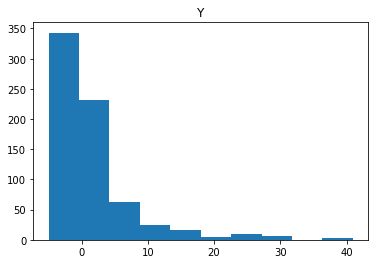

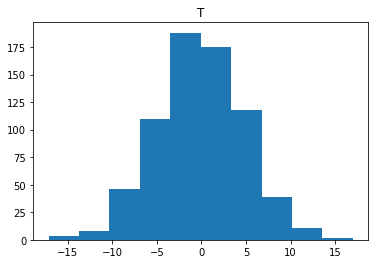

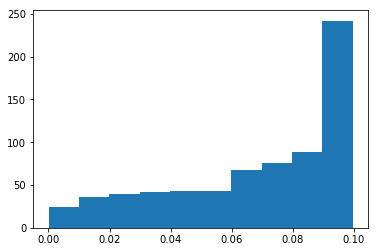

In [3]:
np.random.seed(2)

d = 2  # dimension of x 
n = 700; 
mu_x = np.zeros(d); 
sigma_x = np.random.normal(size = (d,1))
sigma_x += np.abs(np.min(sigma_x))+0.5
sigma_x = np.multiply(sigma_x, np.eye(d))
sigma_x /= 2# normalize covariances a little bit 

W = 1.5 #treatment effect
# interact_x = 2
white_noise_coef = 0.1

# generate propensity model 
def real_prop(x, beta_prop): 
    T_SIG = 5
    if len(x.shape) > 1: 
        n= x.shape[1]
    else:
        n= len(x)
    return np.dot(x, beta_prop) + np.random.normal(size = (n,1))*T_SIG
    # T is normally distributed conditional on covariates 
    
# coefficient of treatment effect
beta_cons = -5
beta_x = np.random.normal(size = (d,1))
# interaction term with treatment 
beta_x_T = np.random.normal(size = (d,1))*1.5
FREQ = 20 
beta_x_quad_T = np.random.normal(size = (d,1))*0.2

TRUE_PROP_BETA = np.asarray(beta_x_quad_T + np.random.normal( loc= np.ones((d,1))*2, size = (d,1))).flatten()
# print TRUE_PROP_BETA

def real_risk(T, beta_cons, beta_x, beta_x_T, beta_x_quad_T, x):    
    n = len(T); risk = np.zeros(n)
    for i in range(len(T)): 
        risk[i] = -5 + np.abs(T[i])
        if x[i,0] > 0 and x[i,1] > 0: 
            risk[i] = (np.abs(T[i] - x[i,0]))**1.5 #- (np.abs(np.dot(x[i,:],beta_x_quad_T)))**1.5
#             risk[i] = T[i]*beta_cons + np.dot(beta_x.T, x[i,:]) + np.dot(beta_x_T.T, x[i,:]*T[i]) + (T[i]-np.dot(beta_x_quad_T.T,x[i,:]))**2#+ np.dot(beta_x_quad_T.T, (x[i,:]**2)*T[i]) + np.dot(beta_x_high_freq.T, np.sin(x[i,0:HIGH_FREQ_N]*FREQ)*T[i])
    return risk

T_SIG = 4
beta_x_quad_T = np.asarray( [1,2] )
def generate_data(mu_x, sigma_x_mat, n, beta_x_quad_T, unconfounded=False): 
    x = np.random.uniform( low = -2,high=2, size = [n,len(mu_x )] )
	#     x = np.random.multivariate_normal(mean = mu_x, cov= sigma_x_mat, size = n ) 
    # print x.shape 
    # print "xshape"
    T = np.random.normal(0, T_SIG, n) + np.dot(x, beta_x_quad_T) 
    true_resid = T - np.dot(x, beta_x_quad_T); true_Q = norm.pdf( T - np.dot(x, beta_x_quad_T), loc = 0, scale = T_SIG ); y_sigma = 0.5; white_noise_coef = 5
    clf = LinearRegression(); clf.fit(x, T); y_hat = clf.predict(x); Y = np.zeros(n)
    Y = real_risk(T, beta_cons, beta_x, beta_x_T, beta_x_quad_T, x)
    return [x, T, Y, true_Q, clf]

[x_full, T_full, Y_full, true_Q_full, clf] = generate_data(mu_x, sigma_x, n, beta_x_quad_T)

[x_full, T_full, Y_full, true_Q_full, clf] = generate_data(mu_x, sigma_x, n, beta_x_quad_T,unconfounded=True)


#compute real risk 
# print np.mean( real_risk(T_full, beta_cons, beta_x, beta_x_T, beta_x_quad_T, x_full))

plt.hist(Y_full); plt.title('Y'); plt.figure(); plt.title('T'); plt.hist(T_full); Q = true_Q_full; plt.figure(); plt.hist(true_Q_full)


## train/test split and scale data

In [7]:
n = 300
x_test = x_full[n:]; Y_test = Y_full[n:]; T_test = T_full[n:]; true_Q_test = true_Q_full[n:]
x = x_full[0:n]; Y = Y_full[0:n];T = T_full[0:n]; true_Q = true_Q_full[0:n]

x_ = x - np.mean(x) #demean data
mean_x = np.mean(x) 
n = len(T)
X_T = np.hstack([ x,T.reshape([n,1])])
T_ = T.reshape([n,1])

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_T)
X_T_scaled = scaler.transform(X_T)  

### Use these variants for continuous policy evaluation comparison 

In [8]:
## given Known propensities
def off_policy_evaluation_known_Q(**params):
    """
    Takes in a choice of kernel and dictionary of parameters and data required for evaluation
    tau is a vector of treatment values (assumed given)
    If y_samp, T_samp is present, use that instead. 
    """
    [loss, norm_sum] = off_pol_estimator_known_Q(**params)
    h = params['h']
    n = params['n']
    return loss/(norm_sum*1.0*h*n)

def off_pol_estimator_known_Q(**params): 
    THRESH = params['threshold']
    y_out = params['y']; x = params['x']; h = params['h'];n = params['n']; t_lo = params['t_lo'];  t_hi = params['t_hi']
    kernel = params['kernel_func'];kernel_int =  params['kernel_int_func']
    Q = params['Q_known']; 
    if ('y_samp' in params.keys()):
        y_out = params['y_samp']
    if ('T_samp' in params.keys()): 
        T = params['T_samp']
    else: 
        T = params['T']
    if ('x_samp' in params.keys()):
        x = params['x_samp']

    BMI_IND = params.get('BMI_IND') # propensity score for warfarin data evaluations 
    if (params.get('DATA_TYPE') == 'warfarin'): 
        x = params['x'][:,BMI_IND]

    loss = 0
    tau = params['tau']
    clip_tau = np.clip(tau, t_lo, t_hi)
    Qs = np.zeros(n)
    for i in np.arange(n): 
        Q_i = Q[i]
        if (abs(clip_tau[i] - t_lo) <= h):
            alpha = kernel_int((t_lo-clip_tau[i])/h, 1)
        elif (abs(clip_tau[i] - t_hi) <= h):
            alpha = kernel_int(-1,  (t_hi - clip_tau[i])/h )
        else:
            alpha = 1
        Qs[i] = (1.0/h)*kernel( (clip_tau[i] - T[i])/h )/max(Q_i,THRESH)
        loss += kernel( (clip_tau[i] - T[i])/h )*1.0 * y_out[i]/max(Q_i,THRESH) * 1.0/alpha
    norm_sum = np.mean(np.maximum(Qs,THRESH*np.ones(n)))
    return [loss, norm_sum]

## unit test that continuous policy evaluation works

In [10]:
from scipy.stats import norm

t_lo = np.min(X_T_scaled[:,d])
t_hi = np.max(X_T_scaled[:,d])
lr = LinearRegression(); lr.fit(X_T_scaled[:,0:d], X_T_scaled[:,d])
T_hat = lr.predict(X_T_scaled[:,0:d]); #beta_T_gps = np.dot(x[trainind,:],lr.coef_)
resid = X_T_scaled[:,d] - T_hat
# Assume normal noise
mu_resid = np.mean(resid); sigma_resid = np.std(resid)
def norm_T_Q_est(x,t,t_lo,t_hi): 
    return norm.pdf( t - np.dot(x, lr.coef_), loc =  mu_resid, scale = sigma_resid )

n = len(Y)
data = { 'n': n, 'y': Y,'Q': norm_T_Q_est,'x_full': X_T_scaled[:,0:d], 'x': X_T_scaled[:,0:d],'x_samp': X_T_scaled[:,0:d], 'T_samp': X_T_scaled[:,d], 'd': d, 'T': X_T_scaled[:,d],'t_lo': t_lo ,'t_hi': t_hi  }
data['kernel_int_func'] = epanechnikov_int
data['kernel_func'] = epanechnikov_kernel
data['sgn'] = 1; data['threshold'] = 0.03
data['h'] = 1.2; data['Q_known'] = true_Q
# assign tau 
# standardized or not? 
data['tau'] = X_T_scaled[:,d] +2

off_policy_evaluation_known_Q(**data)

29.92270098541192

### helper function to evaluate different methods

In [545]:
%%notify
def get_mse(data, mean_risk): 
    return np.mean((data - mean_risk)**2) + (np.mean(data) - mean_risk)**2 # variance + bias 

'''
POL_X is input wrt standardized treatment space 
needs to be scaled back to normal to evaluate outcome model 
Assume POL_X is unit normalized!
'''
def eval_possibilities(POL_X, x_T_test_sc, x_test, Y_test, Q, Y_mean_old): 
    print "true-in-sample counterfactuals: "
    true_risk = np.mean(real_risk((POL_X*np.std(T))+np.mean(T), beta_cons, beta_x, beta_x_T, beta_x_quad_T, x_test))
#     true_risk = np.mean( real_risk((POL_X*np.std(T_))+np.mean(T_), beta_cons, beta_x, beta_x_T, beta_x_quad_T, x_test))
    print true_risk
    n = len(Y_test); POL_X=POL_X.reshape([n,1])
    T_sc_test = x_T_test_sc[:,d].reshape([n,1]); 
    X_test_pi = np.hstack([ x_T_test_sc[:,0:d], POL_X ])
    K_T_pi = k_T(T_sc_test, POL_X)
    K_pi_pi = k_T(POL_X, POL_X)
    K_XT_XT = k_XT( x_T_test_sc, x_T_test_sc ) + np.eye(n)*10e-3

    print "direct method: "
    dm = np.mean(gp.predict(X_test_pi)) + Y_mean_old # add the empirical mean! 
    print dm
    test_params = {'x_sc': x_T_test_sc[:,0:d], 'T_sc': x_T_test_sc[:,d], 'k_T': k_T, 'k_XT': k_XT, 'k_X': k_X, 'X_pi': X_test_pi, 'K_T_T':K_T_T, 'K_T_pi': K_T_pi, 'K_pi_pi': K_pi_pi, 'K_XT_XT': K_XT_XT }
    test_params['x_aug'] = np.hstack([x_T_test_sc[:,0:d], np.ones(n).reshape([n,1])])
    test_params['pi'] = assignment_rule_2d
    [val, test_wghts] = opt_wghts(POL_X, **test_params)
    print "prop. of strictly positive weights: " + str(sum(test_wghts >0.001)*1.0 / n)
    
    pol_eval =  test_wghts.T * Y_test.reshape([n,1]) * 1.0/n 
    print "weight-based evaluation: "
    print pol_eval + mean_x
    print "continuous off policy evaluator"
    data = { 'n': len(Y_test), 'y': Y_test,'Q': Q,'x_full': x_T_test_sc[:,0:d], 'x': x_T_test_sc[:,0:d],'x_samp': x_T_test_sc[:,0:d], 'T_samp': x_T_test_sc[:,d], 'd': d, 'T': x_T_test_sc[:,d],'t_lo': t_lo ,'t_hi': t_hi}
    data['kernel_int_func'] = epanechnikov_int; data['kernel_func'] = epanechnikov_kernel; data['sgn'] = 1; data['threshold'] = 0.03
    data['h'] = 1.2; data['Q_known'] = Q
    data['tau'] = POL_X#*np.std(T))+np.mean(T)
    
    ope = off_policy_evaluation_known_Q(**data)
    print ope
    return [true_risk, dm, pol_eval, ope]

<IPython.core.display.Javascript object>

In [552]:
x_sc.shape

(300, 2)

In [ ]:
def get_pol(tht,**params): 
    n = params['x_sc'].shape[0]
    POL_X = np.asarray( [ params['pi']( tht, params['x_sc'][i,:] ) for i in range(n) ] ).flatten().reshape([n,1]) ; 
    return POL_X

n = x_test.shape[0]
test_n = len(Y_test); N_REPS = 10
# thts = np.asarray([ [1,0,0], [0,1,0], [.5,.5,1], [0,0,2], [2,0,3] ])


def eval_over_reps(thts, N_REPS, POL_FN): 
    n_pols = 4 # number of different evaluation methods 
    risks = np.zeros([len(test_range), n_pols, N_REPS])
    for k in range(N_REPS):
        n=400; 
        [x_test, T_test, Y_test, true_Q, clf] = generate_data(mu_x, sigma_x, n, beta_x_quad_T)
        X_test_T = np.hstack([ x_test,T_test.reshape([n,1])])
        x_T_test_sc = scaler.transform(X_test_T)   ; T_sc_test = x_T_test_sc[:,d].reshape([n,1])
        POL_X = np.dot(x_T_test_sc[:,0:d], beta_x_quad_T).reshape([n,1]); X_test_pi = np.hstack([ x_T_test_sc[:,0:d], POL_X ])
        K_T_pi = k_T(T_sc_test, POL_X); K_T_T = k_T(T_sc_test, T_sc_test); K_pi_pi = k_T(POL_X, POL_X); K_XT_XT = k_XT( x_T_test_sc, x_T_test_sc ) + np.eye(n)*10e-3

        test_params = {'x_sc': x_T_test_sc[:,0:d],'n':n, 'T_sc': x_T_test_sc[:,d], 'k_T': k_T, 'k_XT': k_XT, 'k_X': k_X, 'X_pi': X_test_pi, 'K_T_T':K_T_T, 'K_T_pi': K_T_pi, 'K_pi_pi': K_pi_pi, 'K_XT_XT': K_XT_XT }
        test_params['pi'] = assignment_rule_2d

        for (ind, test_t) in enumerate(test_range): 
            print '-------t------------'
            print test_t
            print '---------'
            #(np.ones(test_n)*test_t)*np.std(T)+np.mean(T)
            pol = get_pol(thts[ind,:], **test_params)
            # evaluate policy projected to scaled space 
            risks[ind,:, k] = eval_possibilities( (pol-np.mean(T))/np.std(T), x_T_test_sc, x_test, Y_test, true_Q, np.mean(Y) )
    return risks


risks = eval_over_reps( thts, N_REPS, get_pol )

In [551]:
test_params = {'x_sc': x_T_test_sc[:,0:d], 'T_sc': x_T_test_sc[:,d], 'k_T': k_T, 'k_XT': k_XT, 'k_X': k_X, 'X_pi': X_test_pi, 'K_T_T':K_T_T, 'K_T_pi': K_T_pi, 'K_pi_pi': K_pi_pi, 'K_XT_XT': K_XT_XT }
test_range = np.linspace(-.2,.2,5)
n_pols = 4 
test_n = len(Y_test)
risks = np.zeros([len(test_range), n_pols])
for (ind, test_t) in enumerate(test_range): 
    print '-------t------------'
    print test_t
    print '---------'
    risks[ind,:] = eval_possibilities( (np.ones(test_n)*test_t)*np.std(T)+np.mean(T) , x_T_test_sc, x_test, Y_test,true_Q_test, np.mean(Y) )



-------t------------
-0.2
---------
true-in-sample counterfactuals: 
2.57469696802
direct method: 
2.36644618097
prop. of strictly positive weights: [[ 0.3575]]
weight-based evaluation: 
[[ 1.09024674]]
continuous off policy evaluator
[ 0.23957388]
-------t------------
-0.1
---------
true-in-sample counterfactuals: 
-1.41776786459
direct method: 
-1.41513931895
prop. of strictly positive weights: [[ 0.2]]
weight-based evaluation: 
[[-1.83435438]]
continuous off policy evaluator
[-0.96295469]
-------t------------
0.0
---------
true-in-sample counterfactuals: 
-3.00004517945
direct method: 
-2.70574447571
prop. of strictly positive weights: [[ 0.2775]]
weight-based evaluation: 
[[-3.0313785]]
continuous off policy evaluator
[-1.11988048]
-------t------------
0.1
---------
true-in-sample counterfactuals: 
0.0773798099922
direct method: 
-0.730489219331
prop. of strictly positive weights: [[ 0.3425]]
weight-based evaluation: 
[[ 0.40965942]]
continuous off policy evaluator
[ 0.3345952]
---

In [ ]:
eval_possibilities(np.zeros(n), x_T_test_sc, x_test, Y_test)

In [ ]:
eval_possibilities(np.ones(n), x_T_test_sc, x_test, Y_test)

In [ ]:
reps = 10
vals = np.zeros([reps, 4])
for i in range(reps): 
    print i 
    [true_risk, dm, wght_eval, ope] = eval_possibilities(np.dot(x_T_test_sc[:,0:d], np.random.uniform(size=d)) , x_T_test_sc, x_test, Y_test)
    vals[0,:] = [true_risk, dm, wght_eval, ope]


In [ ]:
np.dot(x_test,beta_x_quad_T)